# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Nima Samadi
2.   Student Number: 401200403


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
# from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [37]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [38]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

plays_renamed = plays.rename(columns={"artistID": "id"})
ap = pd.merge(plays_renamed, artists, on='id')
ap = ap.sort_values(["id", "userID"])
ap["artistID"] = ap["id"]
ap = ap[["id", "name", "userID", "artistID", "weight"]]
ap = ap.reset_index(drop=True)

In [39]:
ap

,id,name,userID,artistID,weight
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152
...,...,...,...,...,...
92829,18741,Diamanda Galás,454,18741,301
92830,18742,Aya RL,454,18742,294
92831,18743,Coptic Rain,454,18743,287
92832,18744,Oz Alchemist,454,18744,286


In [40]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})

In [41]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################

ap = ap.drop(columns=['id'])
ap = ap.reset_index(drop=True)
ap

,name,userID,artistID,playCount
0,MALICE MIZER,34,1,212
1,MALICE MIZER,274,1,483
2,MALICE MIZER,785,1,76
3,Diary of Dreams,135,2,1021
4,Diary of Dreams,257,2,152
...,...,...,...,...
92829,Diamanda Galás,454,18741,301
92830,Aya RL,454,18742,294
92831,Coptic Rain,454,18743,287
92832,Oz Alchemist,454,18744,286


In [42]:
###############################################################################
## TODO: Create  a Dataframe like below where "totalUniqueUsers" is the number of
## userID's assigned to each name in "ap" dataframe.
## "totalArtistPlays" is sum of all playcounts assigned to an artist  
## and sort the Frame in descending order of "totalArtistPlays" (highest "totalArtistPlays" at top of table) 
## and "avgUserPlays" is divison of "totalArtistPlays" by "totalUniqueUsers"  
###############################################################################

unique_users_df = ap.groupby(by=["name"])["userID"].count()
artist_plays_df = ap.groupby(by=["name"])["playCount"].sum()
artist_rank = pd.merge(unique_users_df, artist_plays_df, on='name')
artist_rank = artist_rank.rename(columns={"userID": "totalUniqueUsers", "playCount": "totalArtistPlays"}, errors="raise")
artist_rank = artist_rank.sort_values(["totalArtistPlays"], ascending=False)
artist_rank['avgUserPlays'] = artist_rank["totalArtistPlays"] / artist_rank["totalUniqueUsers"]

In [43]:
artist_rank

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.559387
Depeche Mode,282,1301308,4614.567376
Lady Gaga,611,1291387,2113.563011
Christina Aguilera,407,1058405,2600.503686
Paramore,399,963449,2414.659148
...,...,...,...
Morris,1,1,1.000000
Eddie Kendricks,1,1,1.000000
Excess Pressure,1,1,1.000000


In [44]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################

ap = pd.merge(ap, artist_rank, on='name')
ap = ap.sort_values(["playCount"], ascending=False)

In [45]:
ap.head(20)

,name,userID,artistID,playCount,totalUniqueUsers,totalArtistPlays,avgUserPlays
2800,Depeche Mode,1642,72,352698,282,1301308,4614.567376
35843,Thalía,2071,792,324663,26,350035,13462.884615
27302,U2,1094,511,320725,185,493024,2664.994595
8152,Blur,1905,203,257978,114,318221,2791.412281
26670,Paramore,1664,498,227829,399,963449,2414.659148
21191,Evanescence,1146,378,203165,226,513476,2272.017699
14165,Christina Aguilera,514,292,176133,407,1058405,2600.503686
33309,Shakira,1983,701,172496,319,688529,2158.398119
33127,Shakira,757,701,169596,319,688529,2158.398119
31835,Glee Cast,1086,679,165902,249,506453,2033.947791


# Exploration

In [46]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/home/nima/.virtualenvs/ai-python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


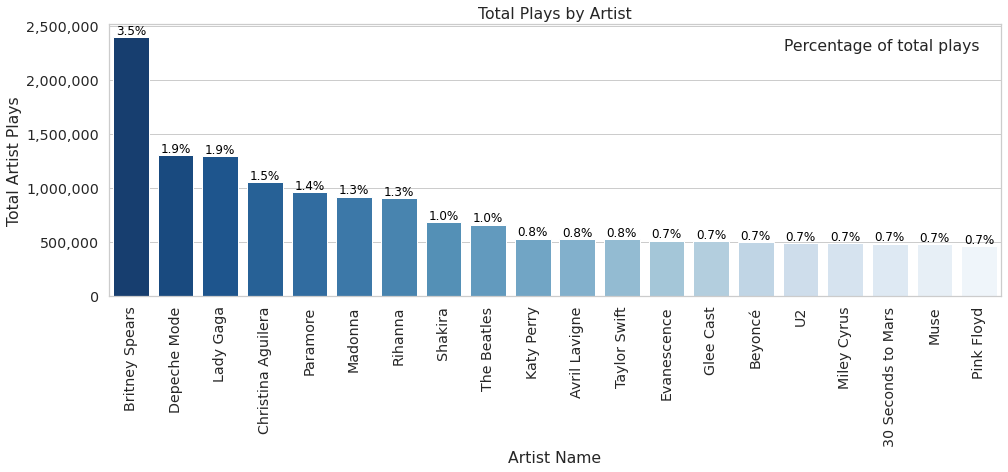

In [47]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

/home/nima/.virtualenvs/ai-python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


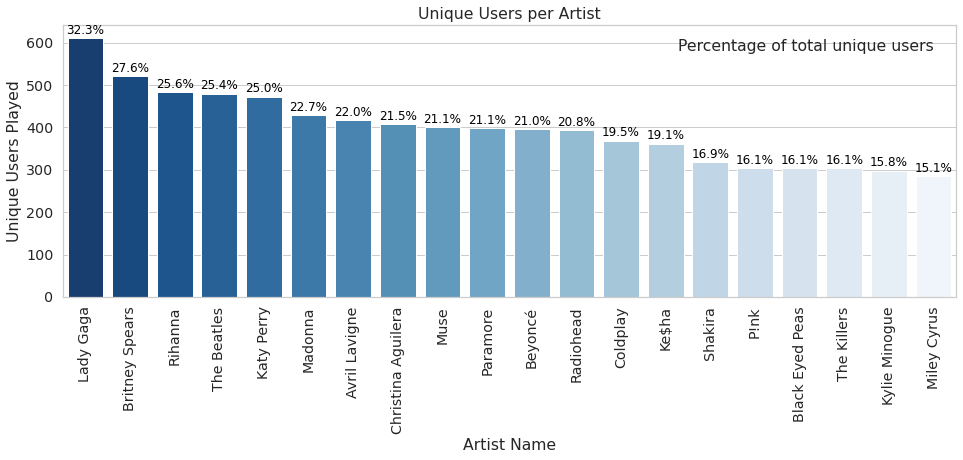

In [48]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/home/nima/.virtualenvs/ai-python/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


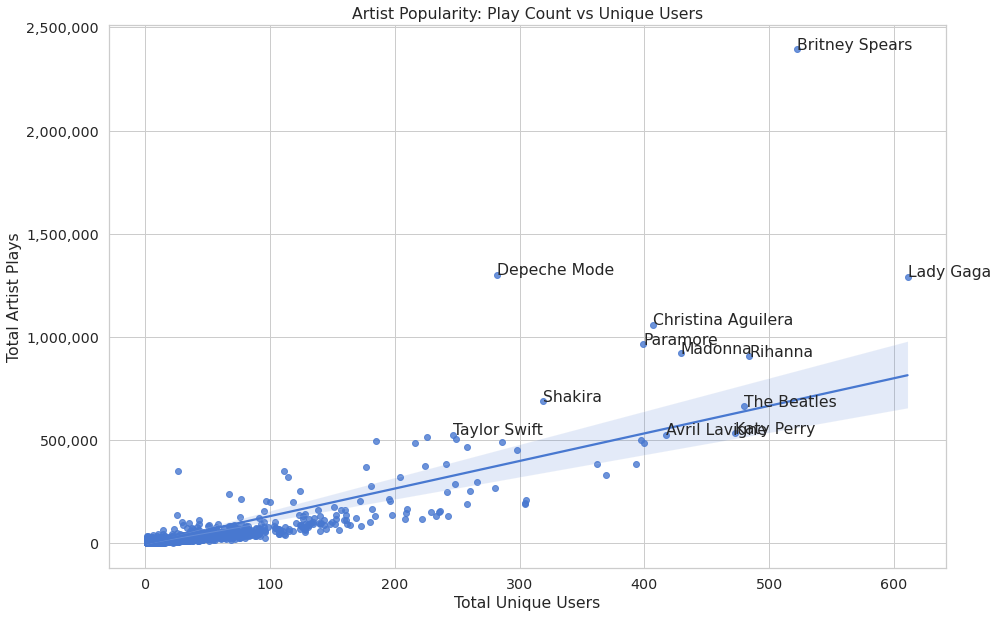

In [49]:
# top_artists =  # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"
top_artists = artist_rank["totalArtistPlays"].nlargest(n=12).index

# x = # TODO : "totalUniqueUsers" of "artist_rank"
# y =  # TODO :  "totalArtistPlays" of "artist_rank"
# labels =  # TODO : index of "artist_rank"

x = artist_rank["totalUniqueUsers"]
y = artist_rank["totalArtistPlays"]
labels = artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [50]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [51]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################

ratings_df = ap.pivot_table(index='userID', columns='artistID', values='playCountScaled')

In [52]:
ratings_df

artistID,1,2,3,4,5,6,7,8,9,10,...,18736,18737,18738,18739,18740,18741,18742,18743,18744,18745
userID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################

ratings = ratings_df.to_numpy(na_value=0)

In [54]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
data_sparsity = np.count_nonzero(ratings) / (ratings.shape[0] * ratings.shape[1]) * 100
print("Data sparsity is {:.3f}%".format(data_sparsity))
## END

Data sparsity is 0.276%


# Fitting(Training) Model (50pts)

In [60]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################

def train_test_split(ratings):
    train = ratings.copy()
    validation = np.zeros(ratings.shape)
    num_observed_ratings = np.sum(ratings > 0, axis = 1)
    users_more_than_thr = np.where(num_observed_ratings > MIN_USER_RATINGS)[0]
    for user_idx in users_more_than_thr:
        nonzero_elements = np.nonzero(train[user_idx])[0]
        deleted_elements = np.random.choice(nonzero_elements, DELETE_RATING_COUNT, replace=False)
        validation[user_idx, deleted_elements] = train[user_idx, deleted_elements]
        train[user_idx, deleted_elements] = 0.0

    return train, validation

In [61]:
train, val = train_test_split(ratings)

In [109]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################

# I only pass observed ground truth values, so this issue handles somewhere else
def rmse(prediction, ground_truth):
    assert prediction.shape == ground_truth.shape
    # observed_values = np.nonzero(ground_truth)
    # prediction = prediction[observed_values]
    # ground_truth = ground_truth[observed_values]
    return sqrt(mean_squared_error(prediction, ground_truth))

In [110]:
a = np.array([[1, 2, 3], [-2, 4, 7]])
b = np.array([[0, 2, -1], [3, 4, 0]])
print(a*b)
print(np.sum(a*b, axis=1).reshape(-1, 1))

[[ 0  4 -3]
 [-6 16  0]]
[[ 1]
 [10]]


In [133]:
class Recommender:  
    def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
        self.n_epochs = n_epochs
        self.n_latent_features = n_latent_features
        self.lmbda = lmbda
        self.learning_rate = learning_rate
        self.train_errors = []
        self.valid_errors = []
  
    def predictions(self, P, Q):
        preds = np.sum(P * Q, axis=1).reshape(-1, 1)
        return preds
      
    def fit(self, X_train, X_val):
        #TODO : Learn the model(P and Q) based on paper, you can initialize them with random gaussians

        # Initialize more systematically
        print("Intializing P and Q...")
        P = np.random.randn(X_train.shape[0], self.n_latent_features)*0.25+0.5
        Q = np.random.randn(X_train.shape[1], self.n_latent_features)*0.25+0.5
        
        train_non_zero_indices = np.nonzero(X_train)
        train_users_index = train_non_zero_indices[0]
        train_items_index = train_non_zero_indices[1]

        valid_non_zero_indices = np.nonzero(X_val)
        valid_users_index = valid_non_zero_indices[0]
        valid_items_index = valid_non_zero_indices[1]

        for epoch in range(self.n_epochs):
            if epoch % 10 == 0:
                print("At epoch = {}".format(epoch))
            preds = self.predictions(P[train_users_index, :], Q[train_items_index, :])
            ground_truth = X_train[train_non_zero_indices].reshape(-1, 1)

            # calculate errors
            error_values = ground_truth - preds
            self.train_errors.append(rmse(preds, ground_truth))
            
            preds_val = self.predictions(P[valid_users_index, :], Q[valid_items_index, :])
            ground_truth_val = X_val[valid_non_zero_indices].reshape(-1, 1)
            self.valid_errors.append(rmse(preds_val, ground_truth_val))
            if epoch % 10 == 0:
                print("Training loss {:.3f}".format(self.train_errors[-1]))
                print("Validation loss {:.3f}".format(self.valid_errors[-1]))
            # update phase
            Q[train_items_index, :] += self.learning_rate * (error_values * P[train_users_index, :] - self.lmbda * Q[train_items_index, :])
            P[train_users_index, :] += self.learning_rate * (error_values * Q[train_items_index, :] - self.lmbda * P[train_users_index, :])
        
        print("======================")
        print("Final training loss {:.3f}".format(self.train_errors[-1]))
        print("Final validation loss {:.3f}".format(self.valid_errors[-1]))
        
        return self

    def predict(self, X_train, user_index):
        pass
        #TODO : return predicted ratings for unobserved values of specific user index

In [134]:
#creating recommender object
recommender = Recommender().fit(train, val)

Intializing P and Q...
At epoch = 0
Training loss 0.814
Validation loss 0.819
At epoch = 10
Training loss 0.800
Validation loss 0.806
At epoch = 20
Training loss 0.785
Validation loss 0.793
At epoch = 30
Training loss 0.772
Validation loss 0.781
At epoch = 40
Training loss 0.758
Validation loss 0.770
At epoch = 50
Training loss 0.746
Validation loss 0.758
At epoch = 60
Training loss 0.734
Validation loss 0.748
At epoch = 70
Training loss 0.722
Validation loss 0.737
At epoch = 80
Training loss 0.710
Validation loss 0.727
At epoch = 90
Training loss 0.699
Validation loss 0.717
At epoch = 100
Training loss 0.689
Validation loss 0.708
At epoch = 110
Training loss 0.679
Validation loss 0.699
At epoch = 120
Training loss 0.669
Validation loss 0.690
At epoch = 130
Training loss 0.659
Validation loss 0.682
At epoch = 140
Training loss 0.650
Validation loss 0.673
At epoch = 150
Training loss 0.641
Validation loss 0.666
At epoch = 160
Training loss 0.632
Validation loss 0.658
At epoch = 170
Trai

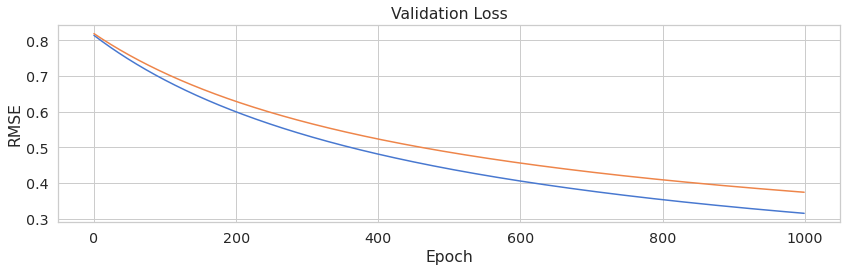

In [137]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################
plt.subplot(2, 1, 1)
plt.plot(np.arange(recommender.n_epochs), recommender.train_errors)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid(True)
plt.plot(np.arange(recommender.n_epochs), recommender.valid_errors)
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()
#TODO

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

In [ ]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**